<function matplotlib.pyplot.show(close=None, block=None)>

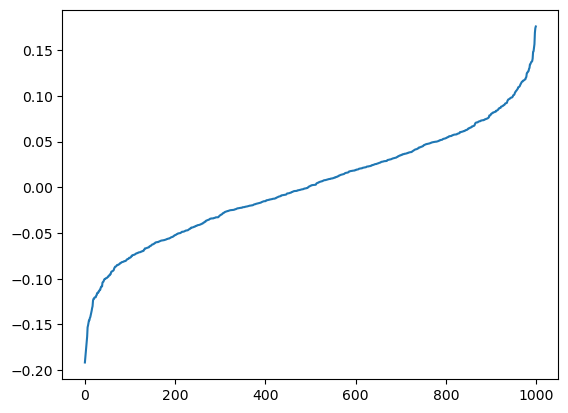

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_bandit_function(k):
    mean, deviation = 0, 1                                                 
    rng = np.random.default_rng()                               
    bandit_means = []
    for x in range(k):                                          #draw k gaussian random numbers q_i as centers
        bandit_means.append(rng.normal(mean, deviation))

    def bandit_function(action):                                #define a function which expects a parameter action and returns a random number from N(q_i,1)
        return rng.normal(bandit_means[action], 1)

    return bandit_function, bandit_means                        #return that function and a list of the q_i's


reward = [0] * 1000
rnd_int = np.random.randint
ep = 500                            #episodes
steps = 1000                        #steps per episode

for _ in range(ep):
    func, _ = get_bandit_function(10)
    for i in range(steps):
        reward[i] += func(rnd_int(0,10))

reward_average = list(map(lambda x: x / ep, reward))

plt.plot(np.sort(reward_average))
plt.show


In [3]:
def update_Q_and_N(Q,N,r,a):
    N[a] += 1
    Q[a] = Q[a] + 1/(N[a]) * (r - Q[a])
    return Q, N

Q = [0] * 10
N = [0] * 10
b_func, list = get_bandit_function(10)

for x in range(100000):
    a = rnd_int(0,10)
    Q, N =update_Q_and_N(Q,N,b_func(a),a)

print(Q)
print(list)

[0.16188371052322242, 0.4549365631938885, -0.7348471847433332, -0.9465960485007359, 0.9153314721382102, -0.36050212823665684, -1.8515480848602197, 0.1603856627841227, -0.9797444676842126, 1.1197405654324526]
[0.15877310799376562, 0.45634109558839075, -0.7626025911920247, -0.9471566991863578, 0.9105031804957097, -0.3633937020862487, -1.8245636056012813, 0.14714629285712647, -0.9805846346708745, 1.124382078592797]


In [4]:
#Greedy

Q = [0] * 10
N = [0] * 10
bandit_function, list = get_bandit_function(10)
a = []

def greedy(bandit_function,Q,N):
    max_a = np.argwhere(Q == np.max(Q))
    if len(max_a) > 1:
        a = np.random.choice(np.ravel(max_a))
    else:
        a = max_a[0][0]
    r = bandit_function(a)
    Q, N = update_Q_and_N(Q,N,r,a)
    return Q,N,r

for x in range(100000):
    Q,N,_ = greedy(bandit_function, Q,N)

print(Q)    
print(N)
print(list)


[0, 0, -2.4978369029697087, 0, 0, 1.0601716234914704, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 99999, 0, 0, 0, 0]
[-1.0979440979012423, 2.138982685232306, -1.686584817152585, -0.02465364061200804, -1.813052847678941, 1.0534810246838675, -0.2480649583222836, 0.23827593967641997, -0.04809933225303246, -0.2561026790281395]


In [5]:
#e greedy

def eps_greedy(bandit_function, eps, Q_0=0,k=10,N=1000):
    R = []
    Q = [Q_0] * k
    N_t = [0] * k
    for x in range(N):
        z = np.random.random_sample()
        if(eps > z):
            a = rnd_int(0,k)
            r = bandit_function(a)
            Q, N_t = update_Q_and_N(Q, N_t, r, a)
        else:
            Q, N_t, r = greedy(bandit_function, Q, N_t)
        R.append(r)
    return Q, N_t, R

bandit_function, list = get_bandit_function(10)
Q, N, R = eps_greedy(bandit_function, 0.025)

print(Q)
print(N)
print(list)        

[0.9936454283881029, 0.5780402162260125, -0.2481901883662052, 0, 2.0481555180434246, 1.0999326207773488, -0.8128191110816826, -0.39320150145398847, 1.1755742483683418, -1.5921807916153607]
[2, 214, 2, 0, 142, 450, 3, 2, 183, 2]
[-0.3249413018666787, 0.6868884059821574, -1.0978899741758246, -0.112796506254633, 1.8534077953721195, 1.0854653983890696, -0.8546612689149148, -0.15845478325666015, 1.1228747193445985, -0.70586331845404]


In [11]:
def calc_plot(n, episodes, eps, color = 'g', label = '', Q_0 = 0):
    R_t = [0] * n

    for x in range(episodes):
        Q,N,R = eps_greedy(bandit_function, eps, N=n, Q_0 = Q_0)
        for y in range(n):
            R_t[y] += R[y]
    for x in range(n):
        R_t[x] = R_t[x] / episodes

    plt.plot(R_t, color = color, label = label)

<function matplotlib.pyplot.show(close=None, block=None)>

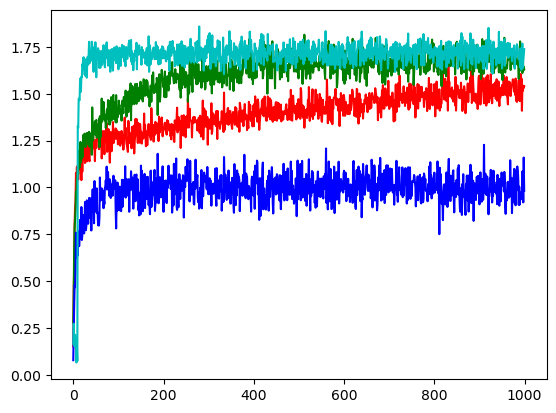

In [13]:
calc_plot(1000, 500, 0.01, "r", "0.01")
calc_plot(1000, 500, 0.1, "g", "0.1")
calc_plot(1000, 500, 0.5, "b", "0.5")
calc_plot(1000,500,0,"c", "0 Q = 5",5)
plt.show

In [ ]:
print("hello")
print("wazzup")
